# 2_1. Implement logistic regression

In [29]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
fulldata=pd.read_csv('AdmissionDataset/data.csv')
fulldata=fulldata.drop(columns=['Serial No.'])

data,testdata=np.split(fulldata,[int(.8*len(fulldata))])

outputdata=data[data.columns[-1]]
inputdata = data[data.columns[0:7]]

In [3]:
mean=np.mean(inputdata)
stdev=np.std(inputdata)

In [4]:
for i in range(len(inputdata.columns)):
    inputdata[inputdata.columns[i]]= [(1.0 * (c-mean[i]))/stdev[i] for c in inputdata[inputdata.columns[i]]]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
X = np.c_[np.ones((inputdata.shape[0], 1)), inputdata]
Y=np.array(outputdata)

In [7]:
theta

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
def weightedinput(theta, x):
    return np.dot(x, theta)

In [10]:
def hx(theta, x):
    return sigmoid(weightedinput(theta, x))

In [11]:
def cost_function(theta, x, y): 
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum( y * np.log(hx(theta, x)) + (1 - y) * np.log(1 - hx(theta, x)))
    return total_cost


In [12]:
cost_function(theta,X, Y)

0.6931471805599455

In [13]:
def gradient(theta, x, y, alpha,iterations):
    # Computes the gradient of the cost function at the point theta
    cost_history = [0] * iterations
    m = x.shape[0]
    for iteration in range(iterations):
        h= hx(theta,x)
        loss = h-y
        grd = np.dot(X.T,loss) / m
        theta = theta - alpha * grd

        cost = cost_function(theta,x, y)
        cost_history[iteration] = cost
    
    return theta,cost_history

In [14]:
theta = np.zeros(X.shape[1])
theta,cost_history = gradient(theta,X,Y,0.009, 10000)
print(theta)

[ 1.06170846  0.12270189  0.10652058  0.07507187 -0.02292523  0.07185754
  0.39214199  0.06179621]


In [15]:
def predict(row, B):
    row = np.insert(row, 0, 1, axis=0)  
    
    return sigmoid(np.dot(row,B))

In [16]:
def validate(B,testdata,threshold):
    global correct
    global wrong
    global tp
    global fp
    global fn
    global tn
    correct=0
    wrong=0
    tp=0
    tn=0
    fp=0
    fn=0
    validatedata = []
    for i in range(len(testdata.columns)-1):
        col = testdata[testdata.columns[i]]
        normcol = [1.0 * (c-mean[i])/stdev[i] for c in col]
        validatedata.append(normcol)
    
    validatevector=np.array(validatedata).T
    actual=[]
    op = testdata[testdata.keys()[-1]]
    op = np.array(op)
    for i in range(len(op)):
        if( op[i] >=threshold):
            actual.append(1)
        else:
            actual.append(0)

    predicted=[]
    for i in range(len(validatevector)):
        row=validatevector[i]
        y=predict(row,theta)
        if y>=threshold:
            predicted.append(1)
        else:
            predicted.append(0)

    for i in range(len(actual)):
        if actual[i]==predicted[i]:
            if(predicted[i]==1):
                tp+=1;
            else:
                tn+=1;
            correct+=1 
        else:
            if(predicted[i]==0):
                fn+=1;
            else:
                fp+=1;
            wrong+=1
    print(correct)
    accuracy= (correct/(correct+wrong))
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    return accuracy,precision,recall

In [17]:
correct=0
wrong=0
tp=0
tn=0
fp=0
fn=0
accuracy,precision,recall = validate(theta,testdata,0.50)
print(accuracy,precision,recall)

87
0.9666666666666667 0.975609756097561 0.9876543209876543


# KNN on Admission Dataset

In [21]:
def eucliddistance(datarow,testrow):
#     print("datarow", datarow)
#     print("testrow", testrow)
    dist=0
    for x in range(len(datarow.keys())-1):
#         print("values of both the rows",datarow[datarow.keys()[x]],testrow[testrow.keys()[x]])
        dist+= math.pow(datarow[datarow.keys()[x]]-testrow[testrow.keys()[x]],2);
#         print("dist",dist)
    
    dist= math.sqrt(dist)
    return dist

In [26]:
def maxfreq(arrayd):
    c=Counter(arrayd)
    value,count= c.most_common()[0]
#     print("most common",value)
    return value    

In [60]:
def finddistances(data,testdata,k):
    global correct
    global wrong,tp,fp,tn,fn
    correct=0
    wrong=0
    for x in range(len(testdata)):
        distancevector=[]
        for y in range(len(data)):
#             print(data.iloc[y],testdata.iloc[x])
            dist= eucliddistance(data.iloc[y],testdata.iloc[x])
            datarow = data.iloc[y]
            distancevector.append((dist,datarow[datarow.keys()[-1]]))
        
#         print(distancevector)
        sorted_d = sorted(distancevector)
#         print(sorted_d)
        i=0
        arrayd=[]
        
        for key in sorted_d:
            if i==k:
                break
            arrayd.append(key[1])
            i+=1
        
#         print("arrayd", arrayd)
        
        predictedlabel = maxfreq(arrayd)
#         print("two values to be compared",predictedlabel, list(testdata.iloc[x])[0])
#         print(predictedlabel, list(testdata.iloc[x])[-1])
        
        if predictedlabel== list(testdata.iloc[x])[-1]:
            if predictedlabel==0:
                tn+=1
            else:
                tp+=1
            correct+=1
        else:
            if predictedlabel==0:
                fn+=1
            else:
                fp+=1
            wrong+=1
   
    accuracy=correct/(wrong+correct)
    precision=(tp/(tp+fp))
    recall=(tp/(tp+fn))
    f1score=(2/((1/precision)+(1/recall)))
    return accuracy,precision,recall,f1score

In [63]:
ylabel=[]
xlabel=[]
correct=0
wrong=0
A=[]
F=[]
P=[]
R=[]

for x in range(1, int(math.sqrt(len(data)))):
    tp=0;
    tn=0;
    fp=0;
    fn=0;
    accuracy,precision,recall,f1score=finddistances(data,testdata,x)
    A.append(accuracy)
    P.append(precision)
    F.append(f1score)
    R.append(recall)
    ylabel.append(accuracy)
    xlabel.append(x)

86
86
87
86
85
83
85
83
84
84
83
84
84
84
85
85
85


In [65]:
max(ylabel)

0.07777777777777778

The accuracy when KNN is used is .077 as compared to 0.96 when K means is used.

# 2_3. Corelation between threshold value vs precision and recall

In [66]:
A=[]
P=[]
R=[]
T=[]
for i in range(1,10):

    th = float(i/10)
    accuracy,precision,recall = validate(theta,testdata,th)
    A.append(accuracy)
    P.append(precision)
    R.append(recall)
    T.append(th)

90
90
90
88
87
81
71
79
82


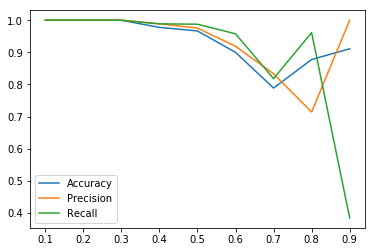

In [67]:
fig, ax = plt.subplots()
ax.plot(T, A,  label='Accuracy')
ax.plot(T, P, label='Precision')
ax.plot(T, R,  label='Recall')
legend = ax.legend(loc='lower left')

plt.show()